In [1]:
import nltk
import pandas as pd
import numpy as np
import os

from keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split 

import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Dataset 

In [2]:
path = "d:/01. sem1-22.23/NLP/dataset/sentiment-analysis/ntc-scv/data_train/"

In [3]:
train_path = path + "train"
test_path = path + "test"

In [4]:
train_neg, train_pos = [], []
test_neg, test_pos = [], []

train_neg = os.listdir(train_path + "/neg")
train_pos = os.listdir(train_path + "/pos")
test_neg = os.listdir(test_path + "/neg")
test_pos = os.listdir(test_path + "/pos")

In [5]:
len(train_neg),len(train_pos), len(test_neg),len(test_pos)

(15000, 15000, 5000, 5000)

## Trainset

In [6]:
trainset = []
train_len_class = 10000
# train neg
for file in train_neg[:train_len_class]:
    with open(train_path + "/neg/" + file, "r", encoding = "utf-8") as f:
        trainset.append(f.read())

# train pos
for file in train_pos[:train_len_class]:
    with open(train_path + "/pos/" + file, "r", encoding = "utf-8") as f:
        trainset.append(f.read())

## Testset

In [7]:
testset = []
test_len_class = 1000
# test neg
for file in test_neg[:test_len_class]:
    with open(test_path + "/neg/" + file, "r", encoding = "utf-8") as f:
        testset.append(f.read())

# test pos
for file in test_pos[:test_len_class]:
    with open(test_path + "/pos/" + file, "r", encoding = "utf-8") as f:
        testset.append(f.read())

In [8]:
y_train_neg = np.zeros(train_len_class)
y_train_pos = np.ones(train_len_class)
y_test_neg = np.zeros(test_len_class)
y_test_pos = np.ones(test_len_class)

y_train = np.concatenate([y_train_neg, y_train_pos])
y_test = np.concatenate([y_test_neg, y_test_pos])

In [9]:
cols = ["cmt", "class"]
train = pd.DataFrame(data = zip(trainset, y_train), columns=cols)
test = pd.DataFrame(data = zip(testset, y_test), columns=cols)
dataset = pd.concat([train, test])
dataset.sample(3)

,cmt,class
83,"Thiết_kế : dạng giống bên quán urban station\nGiá : tương_đối mềm\nPhục_vụ : bình_thường\nThức uống : đã thử trà đào và vanilla coffee . cực dở . trà thì hok ngọt , hok chát hay chua gì hết , kiểu cứ lợ lợ chắc do mình uống bên Phúc_Long quen rồi . cà_phê vị cũng lợ lợ , mà hok hiểu sao mình nó đặc lắm , hok phải vì đá , có cảm_giác bột bột .\nNói_chung tiền nào cuả nấy . Mình thì chắc hok quay lại . Mà hok hiêủ sao quán đông dã_man . Chắc là_lạ khẩu_vị vs mấy em teen ở đây . mà vào đây toàn thấy "" nam thanh_nữ tú "" , ai cũng chu mỏ phồng má trợn mắt hết .\nChắc do đã đi nhiều quán kiểu thiếu kế như_vậy nên thấy cũng bt .\n",0.0
120,Quán dễ tìm trang_trí khá bắt_mắt đồ uống cũng khá ngon nhưng nhân_viên bảo_vệ quá tệ làm vỡ đèn_pha xe_khách không xin_lỗi thì_thôi còn tỏ_vẻ không liên_quan đến mình và thái_độ với khách_hàng quá tệ cho một ngày đẹp trời như hôm_nay lãng_phí 3 tiếng cuộc_đời\n,0.0
463,"Đây là toàn_bộ hình_hộp bánh mình mua .\nHình thực_tế chứ không phải mình cố_tình dìm hàng .\nBánh mới mua chưa mở hộp nhìn rất đẹp và ngon_mắt , nhưng chất_lượng bên trong hoàn_toàn khác .\n",0.0


In [10]:
print(dataset.shape)

(22000, 2)


In [18]:
modes = [
    "binary",
    "tfidf",
    "count",
    "freq"
]
model_names = ["LGR_" + mode for mode in modes]

# Word Tokenizer

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts=dataset.cmt)

In [13]:
save_path = "saved_models/"

In [14]:
# save our tokenizer
pickle.dump(tokenizer, open("tokenizer.sav", 'wb'))

# Modeling

In [19]:
models = []

for i in range(4):
    # word vector
    X = tokenizer.texts_to_matrix(texts=dataset.cmt, mode=modes[i])
    x_train, x_test, y_train, y_test = train_test_split(X, dataset["class"], random_state=1)
    
    # logistic regression
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # save model
    models.append(model)
    filename =  save_path + model_names[i] + ".sav"
    pickle.dump(model, open(filename, 'wb'))

    # testing model 
    print(model_names[i])
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred=y_pred, y_true=y_test))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR_binary
0.8690909090909091


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR_tfidf
0.8358181818181818


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR_count
0.8727272727272727
LGR_freq
0.8263636363636364


In [20]:
import matplotlib.pyplot as plt

In [21]:
acc = {
    "LGR_binary": 0.8690909090909091,
    "LGR_tfidf": 0.8358181818181818,
    "LGR_count": 0.8727272727272727,
    "LGR_freq": 0.8263636363636364
}

<BarContainer object of 4 artists>

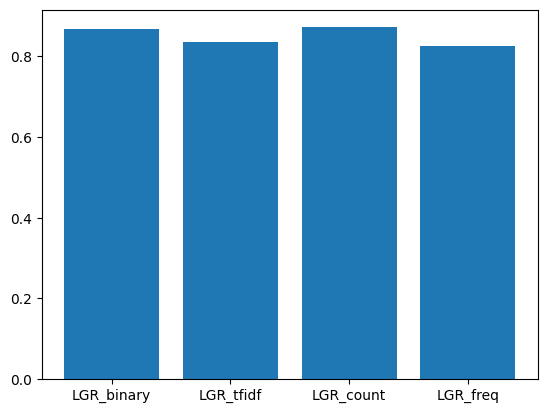

In [24]:
plt.bar(acc.keys(), acc.values())